<a href="https://colab.research.google.com/github/kension0929/MyProject/blob/master/DDD_Demo_v1F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Environment

In [0]:
from google.colab import drive  # to mount Drive to Colab notebook

# Connect Google Drive to Colab
drive.mount('/content/gdrive')
# Create a variable to store the data path on your drive
path = './gdrive/My Drive/0.Projects/Project/Colab Demo Data/'

# Collecting Data from Twitter API

In [0]:
import tweepy                   # Python wrapper around Twitter API
import json
import csv
from datetime import date
from datetime import datetime
import time

from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

from textblob import TextBlob
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [0]:
auth = tweepy.OAuthHandler('xxxxxx', 'xxxx')
auth.set_access_token('xxxxx', 'xxxxxx')
api = tweepy.API(auth)

In [0]:

screen_name = 'amazon' #'LeoDiCaprio'

# 抓取用户主页上的时间轴里的内容
public_tweets = api.user_timeline(screen_name, count=200)
 
# Tweets
tweets_pub = [[tweet.id_str, tweet.author.name, tweet.author.id_str, tweet.created_at, tweet.text, tweet.retweet_count, tweet.favorite_count] 
              for tweet in public_tweets]

df_tweets_pub = pd.DataFrame(data=tweets_pub, 
                 columns=['id', 'author', 'author_id', 'date', 'tweets', 'retweets','likes'])

df_tweets_pub['tweets_orig']=df_tweets_pub['tweets']

# 去除重複
df_tweets_pub = df_tweets_pub.drop_duplicates(['tweets'])
# 去除空白
df_tweets_pub.dropna(subset=['tweets'], inplace=True)

df_tweets_pub

,id,author,author_id,date,tweets,retweets,likes,tweets_orig
0,1252220256422187009,Amazon,20793816,2020-04-20 12:59:08,"Acts of kindness change the world, and we’re g...",13,86,"Acts of kindness change the world, and we’re g..."
1,1251675014736293888,Amazon,20793816,2020-04-19 00:52:33,@PolishedTalons Your cardboard flower garden l...,0,1,@PolishedTalons Your cardboard flower garden l...
2,1251640541072236544,Amazon,20793816,2020-04-18 22:35:34,@fishsalsa We're happy you're enjoying it! 🌻🌷,1,1,@fishsalsa We're happy you're enjoying it! 🌻🌷
3,1251623415376732165,Amazon,20793816,2020-04-18 21:27:30,@RobGrasso2 Happy reading! 📚 📖 ❤️,0,1,@RobGrasso2 Happy reading! 📚 📖 ❤️
4,1251623010940919809,Amazon,20793816,2020-04-18 21:25:54,@AnxietyInTheSky 🐻 We're bear-y thankful for y...,1,1,@AnxietyInTheSky 🐻 We're bear-y thankful for y...
...,...,...,...,...,...,...,...,...
195,1245130798484926466,Amazon,20793816,2020-03-31 23:28:10,@custommediaco It's great to hear your mother-...,1,6,@custommediaco It's great to hear your mother-...
196,1245130522461982734,Amazon,20793816,2020-03-31 23:27:04,@virginiakbeard Seems like the kiddos always l...,0,0,@virginiakbeard Seems like the kiddos always l...
197,1245067046964146179,Amazon,20793816,2020-03-31 19:14:50,@StacyZapar Looks like Nola will be busy for a...,1,4,@StacyZapar Looks like Nola will be busy for a...
198,1245060377081192448,Amazon,20793816,2020-03-31 18:48:20,@MurnPhoto 🐳 We're so glad we could remind you...,0,1,@MurnPhoto 🐳 We're so glad we could remind you...


## Retrieve Keywords and Infomation

In [0]:
# Retrieve all @User

matches = df_tweets_pub['tweets_orig'].str.extractall(r'(@[\w]*)').unstack()

#Combi
# df_tweets_pub['RTA'] = [','.join(filter(None,li)) for li in matches.values]

df_tweets_pub['RTA'] = ''
for _,col in matches.fillna('').iteritems():
    df_tweets_pub['RTA'] += col + ' '
df_tweets_pub['RTA'] = df_tweets_pub['RTA'].str.rstrip(',')

# Show Result
df_tweets_pub[df_tweets_pub['RTA'].notnull()]

,id,author,author_id,date,tweets,retweets,likes,tweets_orig,RTA
1,1251675014736293888,Amazon,20793816,2020-04-19 00:52:33,@PolishedTalons Your cardboard flower garden l...,0,1,@PolishedTalons Your cardboard flower garden l...,@PolishedTalons
2,1251640541072236544,Amazon,20793816,2020-04-18 22:35:34,@fishsalsa We're happy you're enjoying it! 🌻🌷,1,1,@fishsalsa We're happy you're enjoying it! 🌻🌷,@fishsalsa
3,1251623415376732165,Amazon,20793816,2020-04-18 21:27:30,@RobGrasso2 Happy reading! 📚 📖 ❤️,0,1,@RobGrasso2 Happy reading! 📚 📖 ❤️,@RobGrasso2
4,1251623010940919809,Amazon,20793816,2020-04-18 21:25:54,@AnxietyInTheSky 🐻 We're bear-y thankful for y...,1,1,@AnxietyInTheSky 🐻 We're bear-y thankful for y...,@AnxietyInTheSky
5,1251597422880587776,Amazon,20793816,2020-04-18 19:44:13,@Milenamillo1 It's great to hear we can help b...,2,1,@Milenamillo1 It's great to hear we can help b...,@Milenamillo1
...,...,...,...,...,...,...,...,...,...
195,1245130798484926466,Amazon,20793816,2020-03-31 23:28:10,@custommediaco It's great to hear your mother-...,1,6,@custommediaco It's great to hear your mother-...,@custommediaco
196,1245130522461982734,Amazon,20793816,2020-03-31 23:27:04,@virginiakbeard Seems like the kiddos always l...,0,0,@virginiakbeard Seems like the kiddos always l...,@virginiakbeard
197,1245067046964146179,Amazon,20793816,2020-03-31 19:14:50,@StacyZapar Looks like Nola will be busy for a...,1,4,@StacyZapar Looks like Nola will be busy for a...,@StacyZapar
198,1245060377081192448,Amazon,20793816,2020-03-31 18:48:20,@MurnPhoto 🐳 We're so glad we could remind you...,0,1,@MurnPhoto 🐳 We're so glad we could remind you...,@MurnPhoto


In [0]:
# Retrieve Specified Keywords

keywords   = ['coronavirus','China']

pat = '|'.join(format(x) for x in keywords)
matches = df_tweets_pub['tweets_orig'].str.extractall('('+ pat + ')').unstack()

# Combi
df_tweets_pub['KeyWords'] = ''
for _,col in matches.fillna('').iteritems():
    df_tweets_pub['KeyWords'] += col + ' '
df_tweets_pub['KeyWords'] = df_tweets_pub['KeyWords'].str.rstrip(',')

# Show Result
df_tweets_pub[df_tweets_pub['KeyWords'].notnull()]


,id,author,author_id,date,tweets,retweets,likes,tweets_orig,RTA,KeyWords
0,1252220256422187009,Amazon,20793816,2020-04-20 12:59:08,"Acts of kindness change the world, and we’re g...",13,86,"Acts of kindness change the world, and we’re g...",NaN,
1,1251675014736293888,Amazon,20793816,2020-04-19 00:52:33,@PolishedTalons Your cardboard flower garden l...,0,1,@PolishedTalons Your cardboard flower garden l...,@PolishedTalons,
2,1251640541072236544,Amazon,20793816,2020-04-18 22:35:34,@fishsalsa We're happy you're enjoying it! 🌻🌷,1,1,@fishsalsa We're happy you're enjoying it! 🌻🌷,@fishsalsa,
3,1251623415376732165,Amazon,20793816,2020-04-18 21:27:30,@RobGrasso2 Happy reading! 📚 📖 ❤️,0,1,@RobGrasso2 Happy reading! 📚 📖 ❤️,@RobGrasso2,
4,1251623010940919809,Amazon,20793816,2020-04-18 21:25:54,@AnxietyInTheSky 🐻 We're bear-y thankful for y...,1,1,@AnxietyInTheSky 🐻 We're bear-y thankful for y...,@AnxietyInTheSky,
...,...,...,...,...,...,...,...,...,...,...
195,1245130798484926466,Amazon,20793816,2020-03-31 23:28:10,@custommediaco It's great to hear your mother-...,1,6,@custommediaco It's great to hear your mother-...,@custommediaco,
196,1245130522461982734,Amazon,20793816,2020-03-31 23:27:04,@virginiakbeard Seems like the kiddos always l...,0,0,@virginiakbeard Seems like the kiddos always l...,@virginiakbeard,
197,1245067046964146179,Amazon,20793816,2020-03-31 19:14:50,@StacyZapar Looks like Nola will be busy for a...,1,4,@StacyZapar Looks like Nola will be busy for a...,@StacyZapar,
198,1245060377081192448,Amazon,20793816,2020-03-31 18:48:20,@MurnPhoto 🐳 We're so glad we could remind you...,0,1,@MurnPhoto 🐳 We're so glad we could remind you...,@MurnPhoto,


In [0]:
# Retrieve all #Hashtags

matches = df_tweets_pub['tweets_orig'].str.extractall(r'(#[\w]*)').unstack()

#Combi
# df_tweets_pub['Hashtags'] = [','.join(filter(None,li)) for li in matches.values]

df_tweets_pub['Hashtags'] = ''
for _,col in matches.fillna('').iteritems():
    df_tweets_pub['Hashtags'] += col + ' '
df_tweets_pub['Hashtags'] = df_tweets_pub['Hashtags'].str.rstrip(',')

# Show Result
df_tweets_pub['Hashtags']

# Show Result
df_tweets_pub[df_tweets_pub['Hashtags'].notnull()]


,id,author,author_id,date,tweets,retweets,likes,tweets_orig,RTA,KeyWords,Hashtags
0,1252220256422187009,Amazon,20793816,2020-04-20 12:59:08,"Acts of kindness change the world, and we’re g...",13,86,"Acts of kindness change the world, and we’re g...",NaN,,#rainbowsofhope #thanksfordelivering
6,1251574344037199872,Amazon,20793816,2020-04-18 18:12:31,RT @PrimeVideo: We're spending today at home t...,363,0,RT @PrimeVideo: We're spending today at home t...,@PrimeVideo,,#TogetherAtHom
30,1250944478614925312,Amazon,20793816,2020-04-17 00:29:39,"@JenIsHistory @alexa99 Hi, we love this post! ...",0,0,"@JenIsHistory @alexa99 Hi, we love this post! ...",@JenIsHistory @alexa99,,#yes
31,1250943516051517441,Amazon,20793816,2020-04-17 00:25:50,"@brianeklein Hi, we love this post! Can we use...",1,0,"@brianeklein Hi, we love this post! Can we use...",@brianeklein,,#yes
32,1250943308827783169,Amazon,20793816,2020-04-17 00:25:00,"@dtymitz Hi, we love this post! 🙂Can we use it...",0,0,"@dtymitz Hi, we love this post! 🙂Can we use it...",@dtymitz,,#yes
33,1250942745830494210,Amazon,20793816,2020-04-17 00:22:46,"@SkintDad_Naomi Hi, we love this post! 🙂Can we...",0,0,"@SkintDad_Naomi Hi, we love this post! 🙂Can we...",@SkintDad_Naomi,,#yes
34,1250942489353007104,Amazon,20793816,2020-04-17 00:21:45,"@TaraHeptinstall Hi, we love this post! 🙂Can w...",0,0,"@TaraHeptinstall Hi, we love this post! 🙂Can w...",@TaraHeptinstall,,#yes
35,1250942272046153729,Amazon,20793816,2020-04-17 00:20:53,"@shannybugx3 Hi, we love this post! 🙂 Can we u...",0,0,"@shannybugx3 Hi, we love this post! 🙂 Can we u...",@shannybugx3,,#yes
36,1250942056370860032,Amazon,20793816,2020-04-17 00:20:02,"@norberglindsey @alexa99 Hi, we love this post...",0,1,"@norberglindsey @alexa99 Hi, we love this post...",@norberglindsey @alexa99,,#yes
37,1250941645731684352,Amazon,20793816,2020-04-17 00:18:24,"@Crystalgrzzl @alexa99 Hi, we love this post! ...",0,1,"@Crystalgrzzl @alexa99 Hi, we love this post! ...",@Crystalgrzzl @alexa99,,#yes


## Retrieve Sentiment Keywords

In [0]:
# Semantic Dictionary from (Hu and Liu, KDD-2004, University of Illinois at Chicago,簡稱UIC)

filename = path + 'opinion-lexicon-English/positive-words.txt'

with open(filename, 'r', encoding='utf-8') as f:
    Pos_W = f.readlines()
    Pos_W = [item.rstrip() for item in Pos_W]

filename = path + 'opinion-lexicon-English/negative-words.txt'

with open(filename, 'r', encoding='utf-8') as f:
    Neg_W = f.readlines()
    Neg_W = [item.rstrip() for item in Neg_W]

print('Positive Words = ' ,len(Pos_W))
print('Negative Words = ' ,len(Neg_W))

Positive Words =  2005
Negative Words =  4783


In [0]:
keywords   = Pos_W

pat = '|'.join(format(x) for x in keywords)
matches = df_tweets_pub['tweets_orig'].str.extractall('('+ pat + ')').unstack()

# Combi
df_tweets_pub['Pos_W'] = ''
for _,col in matches.fillna('').iteritems():
    df_tweets_pub['Pos_W'] += col + ' '
df_tweets_pub['Pos_W'] = df_tweets_pub['Pos_W'].str.rstrip(',')

# Count Words
df_tweets_pub['Pos_W_C'] = df_tweets_pub['Pos_W'].str.split().str.len()
df_tweets_pub['Pos_W_C'].fillna(0, inplace=True)

# Show Result
df_tweets_pub[df_tweets_pub['Pos_W'].notnull()]

,id,author,author_id,date,tweets,retweets,likes,tweets_orig,RTA,KeyWords,Hashtags,Pos_W,Pos_W_C
0,1252220256422187009,Amazon,20793816,2020-04-20 12:59:08,"Acts of kindness change the world, and we’re g...",13,86,"Acts of kindness change the world, and we’re g...",NaN,,#rainbowsofhope #thanksfordelivering,kindness grateful thank,3.0
1,1251675014736293888,Amazon,20793816,2020-04-19 00:52:33,@PolishedTalons Your cardboard flower garden l...,0,1,@PolishedTalons Your cardboard flower garden l...,@PolishedTalons,,NaN,amazing,1.0
2,1251640541072236544,Amazon,20793816,2020-04-18 22:35:34,@fishsalsa We're happy you're enjoying it! 🌻🌷,1,1,@fishsalsa We're happy you're enjoying it! 🌻🌷,@fishsalsa,,NaN,happy enjoy,2.0
4,1251623010940919809,Amazon,20793816,2020-04-18 21:25:54,@AnxietyInTheSky 🐻 We're bear-y thankful for y...,1,1,@AnxietyInTheSky 🐻 We're bear-y thankful for y...,@AnxietyInTheSky,,NaN,thank,1.0
5,1251597422880587776,Amazon,20793816,2020-04-18 19:44:13,@Milenamillo1 It's great to hear we can help b...,2,1,@Milenamillo1 It's great to hear we can help b...,@Milenamillo1,,NaN,great bright enjoy,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1245130798484926466,Amazon,20793816,2020-03-31 23:28:10,@custommediaco It's great to hear your mother-...,1,6,@custommediaco It's great to hear your mother-...,@custommediaco,,NaN,great enjoy,2.0
196,1245130522461982734,Amazon,20793816,2020-03-31 23:27:04,@virginiakbeard Seems like the kiddos always l...,0,0,@virginiakbeard Seems like the kiddos always l...,@virginiakbeard,,NaN,like like better like,4.0
197,1245067046964146179,Amazon,20793816,2020-03-31 19:14:50,@StacyZapar Looks like Nola will be busy for a...,1,4,@StacyZapar Looks like Nola will be busy for a...,@StacyZapar,,NaN,like,1.0
198,1245060377081192448,Amazon,20793816,2020-03-31 18:48:20,@MurnPhoto 🐳 We're so glad we could remind you...,0,1,@MurnPhoto 🐳 We're so glad we could remind you...,@MurnPhoto,,NaN,hot glad happier,3.0


In [0]:
keywords   = Neg_W

pat = '|'.join(format(x) for x in keywords)
matches = df_tweets_pub['tweets_orig'].str.extractall('('+ pat + ')').unstack()

# Combi
df_tweets_pub['Neg_W'] = ''
for _,col in matches.fillna('').iteritems():
    df_tweets_pub['Neg_W'] += col + ' '
df_tweets_pub['Neg_W'] = df_tweets_pub['Neg_W'].str.rstrip(',')

# Count Words
df_tweets_pub['Neg_W_C'] = df_tweets_pub['Neg_W'].str.split().str.len()
df_tweets_pub['Neg_W_C'].fillna(0, inplace=True)

# Show Result
df_tweets_pub[df_tweets_pub['Neg_W'].notnull()]

,id,author,author_id,date,tweets,retweets,likes,tweets_orig,RTA,KeyWords,Hashtags,Pos_W,Pos_W_C,Neg_W,Neg_W_C
0,1252220256422187009,Amazon,20793816,2020-04-20 12:59:08,"Acts of kindness change the world, and we’re g...",13,86,"Acts of kindness change the world, and we’re g...",NaN,,#rainbowsofhope #thanksfordelivering,kindness grateful thank,3.0,hang grate,2.0
3,1251623415376732165,Amazon,20793816,2020-04-18 21:27:30,@RobGrasso2 Happy reading! 📚 📖 ❤️,0,1,@RobGrasso2 Happy reading! 📚 📖 ❤️,@RobGrasso2,,NaN,NaN,0.0,din,1.0
6,1251574344037199872,Amazon,20793816,2020-04-18 18:12:31,RT @PrimeVideo: We're spending today at home t...,363,0,RT @PrimeVideo: We're spending today at home t...,@PrimeVideo,,#TogetherAtHom,celebrate heal work,3.0,din brat,2.0
11,1251300126439636996,Amazon,20793816,2020-04-18 00:02:52,@Katelyn_yanes What a special delivery! We'd l...,2,2,@Katelyn_yanes What a special delivery! We'd l...,@Katelyn_yanes,,NaN,love ease,2.0,plea,1.0
12,1251269338511945732,Amazon,20793816,2020-04-17 22:00:32,@StacySstacy6570 This daffodil made us smile! ...,0,0,@StacySstacy6570 This daffodil made us smile! ...,@StacySstacy6570,,NaN,smile,1.0,mad,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1245379852712189952,Amazon,20793816,2020-04-01 15:57:49,@missdub06 We'd love to send some extra suppli...,0,0,@missdub06 We'd love to send some extra suppli...,@missdub06,,NaN,love ease,2.0,miss lie plea ail sin,5.0
190,1245364088340992000,Amazon,20793816,2020-04-01 14:55:11,@SheyBerry We're so happy we can be here for y...,0,0,@SheyBerry We're so happy we can be here for y...,@SheyBerry,,NaN,happy,1.0,err err,2.0
192,1245136521004539914,Amazon,20793816,2020-03-31 23:50:54,@ajcvbteacher ❤️ 📚,0,1,@ajcvbteacher ❤️ 📚,@ajcvbteacher,,NaN,NaN,0.0,ache,1.0
193,1245136495717072898,Amazon,20793816,2020-03-31 23:50:48,@missdub06 It's awesome to hear we can help ma...,0,0,@missdub06 It's awesome to hear we can help ma...,@missdub06,,NaN,awe easier prize,3.0,miss brat,2.0


## Data Cleansing

In [0]:
import re
for i in range(len(df_tweets_pub)):
    txt = df_tweets_pub.loc[i]["tweets"]
    txt = re.sub(r'@[A-Z0-9a-z_:]+','',txt)         # replace username-tags
    txt = re.sub(r'(#[\w]*)', " ",txt)              # replace hashtags
    txt = re.sub(r'^[RT]+','',txt)                  # replace RT-tags
    txt = re.sub('https?://[A-Za-z0-9./]+','',txt)  # replace URLs

    txt = re.sub(r'\s+', " ",txt)                   # replace multiple spaces
    txt = re.sub(r"\s+[a-zA-Z]\s+", " ",txt)        # replace Single character

#   txt = re.sub("[^a-zA-Z]", " ",txt)              # Only remain English works. Remove punctuations and numbers
    df_tweets_pub.at[i,"tweets"]=txt

# Sentiment Labeling

## Sentiment Labeling by SentiWordNet (SWN)

In [0]:

import nltk
from nltk import pos_tag, map_tag
nltk.download(['punkt','averaged_perceptron_tagger','universal_tagset','sentiwordnet','wordnet','stopwords'])

from nltk.corpus import sentiwordnet as swn

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

pstem = PorterStemmer()
lem = WordNetLemmatizer()
stop_words = stopwords.words('english')

for i in range(len(df_tweets_pub.index)):
        text = df_tweets_pub.loc[i]['tweets']
        tokens = nltk.word_tokenize(text)
        tagged_sent = pos_tag(tokens)
        store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# POS-TAGGING AND SENTIMENT SCORE

def pos_senti(df_copy):
    li_swn=[]
    li_swn_pos=[]
    li_swn_neg=[]
    missing_words=[]
    for i in range(len(df_copy.index)):
        text = df_copy.loc[i]['tweets']
        tokens = nltk.word_tokenize(text)
        tagged_sent = pos_tag(tokens)
        store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
        #print("Tagged Parts of Speech:",store_it)

        pos_total=0
        neg_total=0
        for word,tag in store_it:
            if(tag=='NOUN'):
                tag='n'
            elif(tag=='VERB'):
                tag='v'
            elif(tag=='ADJ'):
                tag='a'
            elif(tag=='ADV'):
                tag = 'r'
            else:
                tag='nothing'

            if(tag!='nothing'):
                concat = word+'.'+tag+'.01'
                try:
                    this_word_pos=swn.senti_synset(concat).pos_score()
                    this_word_neg=swn.senti_synset(concat).neg_score()
                    #print(word,tag,':',this_word_pos,this_word_neg)
                except Exception as e:
                    wor = lem.lemmatize(word)
                    concat = wor+'.'+tag+'.01'
                    # Checking if there's a possiblity of lemmatized word be accepted into SWN corpus
                    try:
                        this_word_pos=swn.senti_synset(concat).pos_score()
                        this_word_neg=swn.senti_synset(concat).neg_score()
                    except Exception as e:
                        wor = pstem.stem(word)
                        concat = wor+'.'+tag+'.01'
                        # Checking if there's a possiblity of lemmatized word be accepted
                        try:
                            this_word_pos=swn.senti_synset(concat).pos_score()
                            this_word_neg=swn.senti_synset(concat).neg_score()
                        except:
                            missing_words.append(word)
                            continue
                pos_total+=this_word_pos
                neg_total+=this_word_neg
        li_swn_pos.append(pos_total)
        li_swn_neg.append(neg_total)

        if(pos_total!=0 or neg_total!=0):
            if(pos_total>neg_total):
                li_swn.append(1)
            else:
                li_swn.append(-1)
        else:
            li_swn.append(0)
    df_copy.insert(5,"pos_score",li_swn_pos,True)
    df_copy.insert(6,"neg_score",li_swn_neg,True)
    df_copy.insert(7,"sent_SWN",li_swn,True)
    return df_copy
    # end-of pos-tagging&sentiment

pos_senti(df_tweets_pub)

,id,author,author_id,date,tweets,pos_score,neg_score,sent_SWN,retweets,likes,tweets_orig,RTA,KeyWords,Hashtags,Pos_W,Pos_W_C,Neg_W,Neg_W_C
0,1252220256422187009,Amazon,20793816,2020-04-20 12:59:08,"Acts of kindness change the world, and we’re g...",0.625,0.375,1,13,86,"Acts of kindness change the world, and we’re g...",NaN,,#rainbowsofhope #thanksfordelivering,kindness grateful thank,3.0,hang grate,2.0
1,1251675014736293888,Amazon,20793816,2020-04-19 00:52:33,Your cardboard flower garden looks amazing! 🌺🌹🌼,0.500,0.250,1,0,1,@PolishedTalons Your cardboard flower garden l...,@PolishedTalons,,NaN,amazing,1.0,NaN,0.0
2,1251640541072236544,Amazon,20793816,2020-04-18 22:35:34,We're happy you're enjoying it! 🌻🌷,1.250,0.000,1,1,1,@fishsalsa We're happy you're enjoying it! 🌻🌷,@fishsalsa,,NaN,happy enjoy,2.0,NaN,0.0
3,1251623415376732165,Amazon,20793816,2020-04-18 21:27:30,Happy reading! 📚 📖 ❤️,0.875,0.000,1,0,1,@RobGrasso2 Happy reading! 📚 📖 ❤️,@RobGrasso2,,NaN,NaN,0.0,din,1.0
4,1251623010940919809,Amazon,20793816,2020-04-18 21:25:54,🐻 We're bear-y thankful for you! 🐻 Thank you ...,0.000,0.000,0,1,1,@AnxietyInTheSky 🐻 We're bear-y thankful for y...,@AnxietyInTheSky,,NaN,thank,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1245130798484926466,Amazon,20793816,2020-03-31 23:28:10,It's great to hear your mother-in-law is enjo...,0.375,0.000,1,1,6,@custommediaco It's great to hear your mother-...,@custommediaco,,NaN,great enjoy,2.0,NaN,0.0
196,1245130522461982734,Amazon,20793816,2020-03-31 23:27:04,Seems like the kiddos always like the boxes b...,1.000,0.000,1,0,0,@virginiakbeard Seems like the kiddos always l...,@virginiakbeard,,NaN,like like better like,4.0,NaN,0.0
197,1245067046964146179,Amazon,20793816,2020-03-31 19:14:50,Looks like Nola will be busy for while! 🐶 💕,0.625,0.125,1,1,4,@StacyZapar Looks like Nola will be busy for a...,@StacyZapar,,NaN,like,1.0,NaN,0.0
198,1245060377081192448,Amazon,20793816,2020-03-31 18:48:20,🐳 We're so glad we could remind you of happie...,0.625,0.625,-1,0,1,@MurnPhoto 🐳 We're so glad we could remind you...,@MurnPhoto,,NaN,hot glad happier,3.0,NaN,0.0


## Sentiment Labeling by TextBlob

In [0]:
#TextBlob SENTIMENT LABELING
from textblob import TextBlob
count_total=0
count_pos=0
count_neg=0
count_neut=0

li_tb = []

df_tweets_pub['sent_TextBlob'] = 999

for i in range(len(df_tweets_pub.index)):
  sent = TextBlob(str(df_tweets_pub.loc[i]['tweets']))

  if(sent.sentiment.polarity>0):
      sent_TB = 1
      count_pos=count_pos+1
      count_total=count_total+1
      li_tb.append(1)

  elif(sent.sentiment.polarity<0):
      sent_TB = -1
      count_neg=count_neg+1
      count_total=count_total+1
      li_tb.append(-1)

  else:
      sent_TB = 0
      li_tb.append(0)
      count_neut+=1

  count_total=count_total+1
  df_tweets_pub.loc[i, 'sent_TextBlob'] = sent_TB

  #print(df_tweets_pub.loc[i]['tweets'])
  #print(sent.sentiment)

print("Total tweets:",len(df_tweets_pub.index))
print("Total tweets with sentiment:",count_total)
print("positive tweets:",count_pos)
print("negative tweets:",count_neg)
print("neutral tweets:",count_neut)

set(df_tweets_pub['sent_TextBlob'])

Total tweets: 200
Total tweets with sentiment: 365
positive tweets: 158
negative tweets: 7
neutral tweets: 35


{-1, 0, 1}

### to_csv

In [0]:
# df['tweets'] = df['tweets'].str.replace(",","")

from google.colab import files
df_tweets_pub.to_csv ( path + 'df_tweets_amazon.csv', index = False, header=True) 


## Lemmatization

In [0]:
for i in range(len(df_tweets_pub.index)):
     text = df_tweets_pub.loc[i]['tweets']
     tokens = nltk.word_tokenize(text)
     tokens = [word for word in tokens if word not in stop_words]

for j in range(len(tokens)):
    tokens[j] = lem.lemmatize(tokens[j])
    tokens[j] = pstem.stem(tokens[j])
    
tokens_sent=' '.join(tokens)

df_tweets_pub.at[i,"tweets"] = tokens_sent

## WordCloud

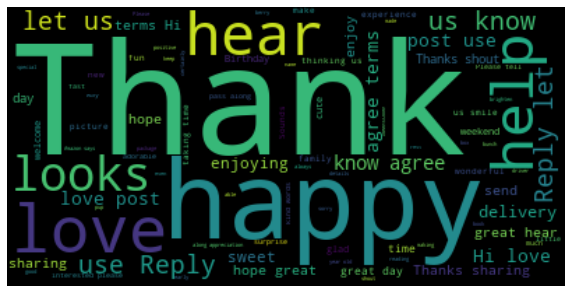

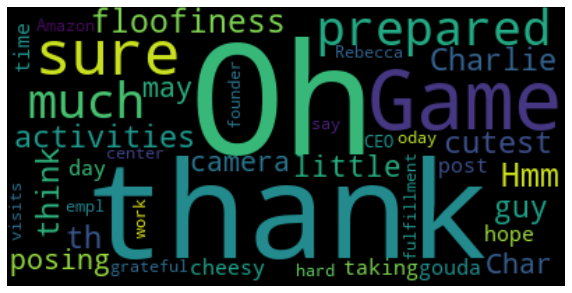

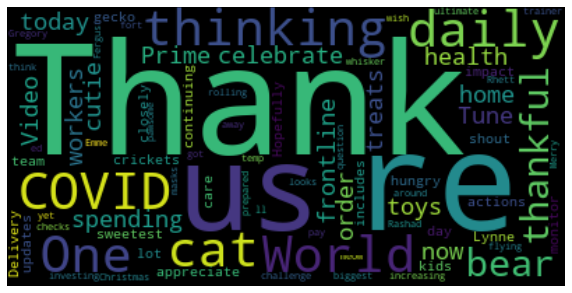

In [0]:
dft = df_tweets_pub

sentiment_label = 'sent_TextBlob'  #sent_score, sent_TextBlob

words_nature =' '.join([text for text in dft['tweets'][dft[sentiment_label] == 0]])
words_positive =' '.join([text for text in dft['tweets'][dft[sentiment_label] == 1]])
words_negative =' '.join([text for text in dft['tweets'][dft[sentiment_label] == -1]])
words_all= ' '.join([text for text in dft['tweets']])

from wordcloud import WordCloud, STOPWORDS

def wordcloud(tweets,col,words_c):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="black",stopwords=stopwords,random_state = 2020, max_font_size=110).generate(words_c)
    plt.figure( figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

wordcloud(dft,'tweets',words_positive) 
wordcloud(dft,'tweets',words_negative)
wordcloud(dft,'tweets',words_nature) 

# Machine Learning for NLP

In [0]:
sentiment_label = 'sent_TextBlob'  #sent_SWN, sent_TextBlob

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
import seaborn as sns

## Bag-of-Words Features

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df_tweets_pub['tweets'])

In [0]:

train_bow = bow[:160,:]
test_bow = bow[160:,:]
train_y = df_tweets_pub.loc[:159, sentiment_label]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_y, random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

predict_p = lreg.predict_proba(xvalid_bow) # predicting on the validation set
predict_c = lreg.predict(xvalid_bow).astype('int')  # 預測標籤結果


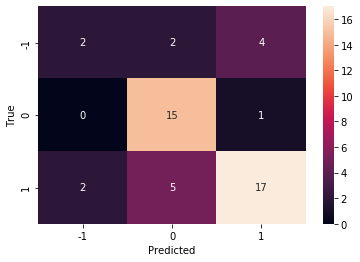

Accuracy : 0.70833
MissClass: 0.29167


In [0]:
## 製作 Confusion Matrix圖表來評估模型

confusion_matrix = metrics.confusion_matrix(y_true = yvalid, y_pred = predict_c, labels=[-1,0,1])

cm =pd.DataFrame(confusion_matrix , index = ['-1', '0', '1'], columns = [ '-1', '0', '1'])
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy = confusion_matrix.trace() / confusion_matrix.sum()
MissClass = 1 - Accuracy

print("Accuracy : %0.5f" % Accuracy)
print("MissClass: %0.5f" % MissClass)


## TF-IDF features

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df_tweets_pub['tweets'])

In [0]:

train_tfidf = tfidf[:160,:]
test_tfidf = tfidf[160:,:]
train_y = df_tweets_pub.loc[:159, sentiment_label]

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain, yvalid = train_test_split(train_tfidf, train_y, random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_tfidf, ytrain) # training the model

predict_p = lreg.predict_proba(xvalid_tfidf) # predicting on the validation set
predict_c = lreg.predict(xvalid_tfidf).astype('int')  # 預測標籤結果


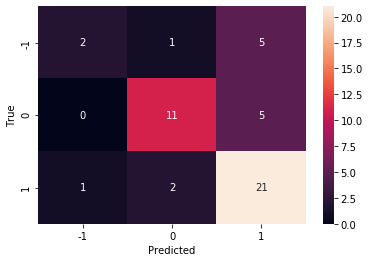

Accuracy : 0.70833
MissClass: 0.29167


In [0]:
## 製作 Confusion Matrix圖表來評估模型

confusion_matrix = metrics.confusion_matrix(y_true = yvalid, y_pred = predict_c, labels=[-1,0,1])

cm =pd.DataFrame(confusion_matrix , index = ['-1', '0', '1'], columns = [ '-1', '0', '1'])
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy = confusion_matrix.trace() / confusion_matrix.sum()
MissClass = 1 - Accuracy

print("Accuracy : %0.5f" % Accuracy)
print("MissClass: %0.5f" % MissClass)


## XGBoost for TF-IDF Features

In [0]:
import xgboost as xgb
from xgboost import XGBClassifier
import pickle
from matplotlib import pyplot
import time

modelml = xgb.XGBClassifier(max_depth=16,
                        subsample=0.9,
                        objective='multi:softmax',
                        num_class=3,
                        n_estimators=500,
                        learning_rate = 0.01)

m1 = modelml.fit(xtrain_tfidf, ytrain)

predict_p = modelml.predict_proba(xvalid_tfidf) # predicting on the validation set
predict_c = modelml.predict(xvalid_tfidf).astype('int')  # 預測標籤結果


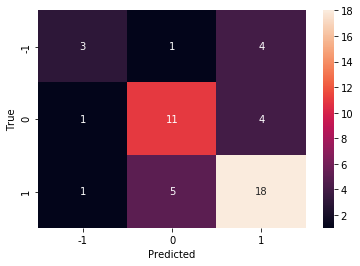

Accuracy : 0.66667
MissClass: 0.33333


In [0]:
## 製作 Confusion Matrix圖表來評估模型

confusion_matrix = metrics.confusion_matrix(y_true = yvalid, y_pred = predict_c, labels=[-1,0,1])

cm =pd.DataFrame(confusion_matrix , index = ['-1', '0', '1'], columns = [ '-1', '0', '1'])
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy = confusion_matrix.trace() / confusion_matrix.sum()
MissClass = 1 - Accuracy

print("Accuracy : %0.5f" % Accuracy)
print("MissClass: %0.5f" % MissClass)


### Save Model

In [0]:
# 儲存模型
from datetime import datetime
from joblib import dump, load
ymd = datetime.now().strftime("%Y%m%d%H%M")
AC = Accuracy.astype('str')

dump(m1, path + 'm1-'+ymd+ AC +'.joblib')

# Deep Learning

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


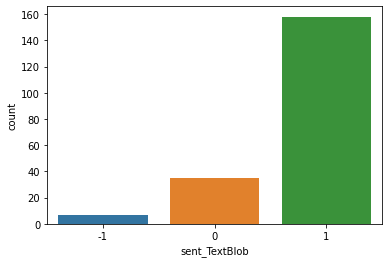

In [0]:

dft = df_tweets_pub
Y_label = 'sent_TextBlob'  #sent_SWN, sent_TextBlob

import seaborn as sns
sns.countplot(x= Y_label, data=dft)

## Pre-process

In [0]:

import nltk
from nltk.corpus import stopwords

from numpy import array

import keras

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics


In [0]:
X=[]
sentences = list(dft['tweets'])

for sen in sentences:
    X.append(sentences)

In [0]:
no_Y = dft[Y_label].nunique()

print(set(dft[Y_label]))
print(no_Y)

{0, 1, -1}
3


In [0]:
# Label Encoding
label_map = {0: 0, -1: -1, 1: 1}

Y = dft[Y_label].map(label_map)
set(Y)

{-1, 0, 1}

In [0]:
# 資料切割：Train & Test

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.3, random_state=320) 

"""
X_train=X_train.drop(columns=[Y_label])
X_test =X_test.drop(columns=[Y_label])

# 查看結果
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)
"""

# 打亂資料集 (增加亂數性，讓模型訓練更好)
X_train, y_train = shuffle(X_train, y_train)


In [0]:
# Keep Label encoding form for Confusion Matrix
y_train_LBE = y_train
y_test_LBE  = y_test

# One-Hot Encoding for Train NN
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=no_Y)
y_test  = to_categorical(y_test, num_classes=no_Y)

### Tokenizer

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [0]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

### Enbedding Layer

In [0]:
### load word2vec model ###
#pre-train model download from: https://github.com/stanfordnlp/GloVe

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/gdrive/My Drive/0.Projects/Project/Colab Demo Data/glove6b100dtxt/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [0]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## Build Model

In [0]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten

from keras.layers.embeddings import Embedding

### Regularizer

In [0]:
# 設定 regularizer 
''' Import l1,l2 (regularizer) '''
from keras.regularizers import l1, l2, l1_l2

import keras.backend as K
# l1_l2_list = [(0, 0), (0.0005, 0), (0, 0.0005), (0.0005, 0.0005), (0, 0.005)] #@param {type:"raw"}

l1_alpha = 0.0005
l2_alpha = 0.0005

### Model 1: Simple NN

In [0]:
model_NN = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model_NN.add(embedding_layer)
model_NN.add(Flatten())
model_NN.add(Dense(no_Y, activation='sigmoid', kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))

print(model_NN.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          19500     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 30003     
Total params: 49,503
Trainable params: 30,003
Non-trainable params: 19,500
_________________________________________________________________
None


### Model 2: CNN

In [0]:
from keras.layers import GlobalMaxPooling1D
from keras.layers import Conv1D

model_CNN = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

model_CNN.add(embedding_layer)
model_CNN.add(Conv1D(128, 5, activation='relu'))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dense(no_Y, activation='sigmoid', kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))

print(model_CNN.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          19500     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 84,015
Trainable params: 64,515
Non-trainable params: 19,500
_________________________________________________________________
None


### Model 3: RNN (LSTM)

In [0]:
from keras.layers import LSTM

model_LSTM = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

model_LSTM.add(embedding_layer)
model_LSTM.add(LSTM(128))
model_LSTM.add(Dense(no_Y, activation='sigmoid', kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))

print(model_LSTM.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          19500     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 137,135
Trainable params: 117,635
Non-trainable params: 19,500
_________________________________________________________________
None


### Model 4: DNN

In [0]:
model_DNN = Sequential()

# 活化函數清單 acti_list = ['sigmoid', 'relu', 'tanh', 'softsign'] #@param {type:"raw"}

# 加入第一層 hidden layer (128 neurons) 與指定 input 的維度
model_DNN.add(Dense(128, input_dim=X_train.shape[1], kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
model_DNN.add(Activation('relu'))

# 加入第二層 hidden layer (256 neurons)
model_DNN.add(Dense(256, kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
model_DNN.add(Activation('relu'))

# 加入第三層 hidden layer (512 neurons)
model_DNN.add(Dense(512, kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
model_DNN.add(Activation('relu'))

# 加入 output layer (5 neurons)
model_DNN.add(Dense(no_Y, kernel_regularizer=l1_l2(l1=l1_alpha, l2=l2_alpha)))
model_DNN.add(Activation('softmax'))

# 觀察 model summary
print(model_DNN.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               12928     
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

## Compiling

In [0]:
# loss_funcs = ['mean_squared_error', 'mean_absolute_error', 'categorical_crossentropy', 'binary_crossentropy']  #@param {type:"raw"}

loss_fun = 'categorical_crossentropy'

In [0]:
from keras.optimizers import SGD, Adam
optim = 'Adam'

# https://keras.io/optimizers/


In [0]:
CandidateModel = model_DNN  # model_NN, model_CNN, model_LSTM, model_DNN

CandidateModel.compile(loss=loss_fun,
                       optimizer=optim,
                       metrics=['accuracy'])

## Training

In [0]:

batch_size = 16 
epochs = 20


import time
start = time.process_time()

fitting_history = CandidateModel.fit(X_train, y_train, 
                                     batch_size=batch_size, 
                                     epochs=epochs, 
                                     verbose=1,
                                     shuffle=True, 
                                     validation_split=0.3)

# 訓練結束
end = time.process_time()
print("訓練時間：%.3fs 秒" % (end - start))

# 測試結果
predict =CandidateModel.predict_classes(X_test)  # 預測標籤結果
predict_cross =CandidateModel.predict(X_test)    # 每個標籤的預測機率

Train on 98 samples, validate on 42 samples
Epoch 1/20
98/98 [==============================] - 2s 18ms/step - loss: 43.2888 - accuracy: 0.5000 - val_loss: 19.6971 - val_accuracy: 0.9048
Epoch 2/20
98/98 [==============================] - 0s 453us/step - loss: 19.8377 - accuracy: 0.6122 - val_loss: 22.3094 - val_accuracy: 0.9048
Epoch 3/20
98/98 [==============================] - 0s 459us/step - loss: 19.5772 - accuracy: 0.7245 - val_loss: 26.8071 - val_accuracy: 0.0476
Epoch 4/20
98/98 [==============================] - 0s 459us/step - loss: 13.1144 - accuracy: 0.6939 - val_loss: 10.8966 - val_accuracy: 0.9048
Epoch 5/20
98/98 [==============================] - 0s 492us/step - loss: 7.4352 - accuracy: 0.6531 - val_loss: 7.7496 - val_accuracy: 0.9048
Epoch 6/20
98/98 [==============================] - 0s 449us/step - loss: 5.4944 - accuracy: 0.6224 - val_loss: 5.6337 - val_accuracy: 0.9048
Epoch 7/20
98/98 [==============================] - 0s 527us/step - loss: 4.5372 - accuracy: 0.62

## Evaluation

60/60 [==============================] - 0s 129us/step

Loss: 2.465, Accuracy: 78.33%


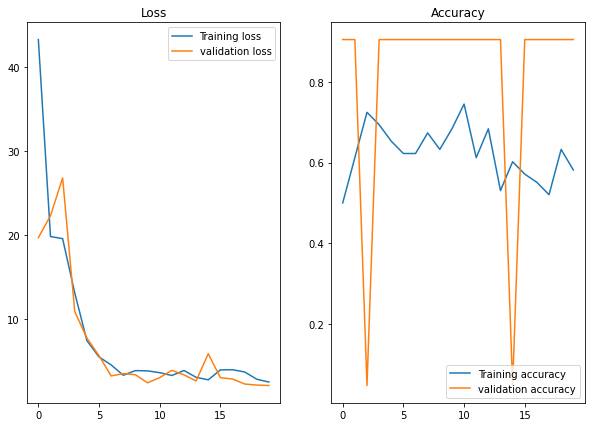

In [0]:
loss, accuracy = CandidateModel.evaluate(X_test, y_test, verbose=1)

print("\nLoss: %.3f, Accuracy: %.2f%%" % (loss, accuracy*100))

#######################

loss     = fitting_history.history.get('loss')      # 取出訓練完成後loss的訓練數據
acc      = fitting_history.history.get('accuracy')       # 取出訓練完成後accuracy的訓練數據
val_loss = fitting_history.history.get('val_loss')  # 取出訓練完成後val_loss的訓練數據
val_acc  = fitting_history.history.get('val_accuracy')   # 取出訓練完成後val_accuracy的訓練數據

from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

''' Visualize the loss and accuracy of both models'''
plt.figure(0)
plt.subplot(121)

plt.plot(range(len(loss)), loss, label='Training loss')
plt.plot(range(len(val_loss)), val_loss, label='validation loss')
plt.title('Loss')
plt.legend(loc='upper right')

plt.subplot(122)

plt.plot(range(len(acc)), acc, label='Training accuracy')
plt.plot(range(len(val_acc)), val_acc, label='validation accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

plt.show()

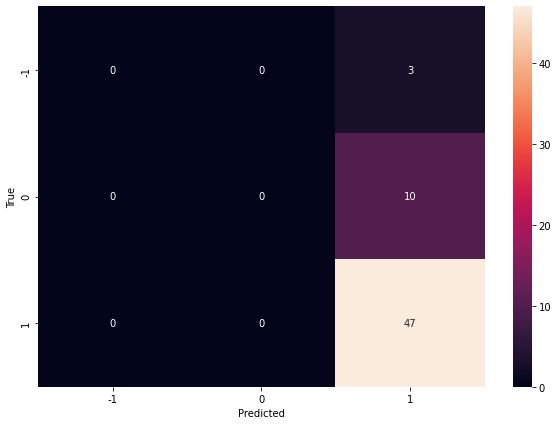

Accuracy : 0.78333
MissClass: 0.21667


In [0]:
## 製作 Confusion Matrix圖表來評估模型

confusion_matrix = metrics.confusion_matrix(y_true=y_test_LBE, y_pred=predict, labels=[-1,0,1])

cm =pd.DataFrame(confusion_matrix , index = ['-1', '0', '1'], columns = [ '-1', '0', '1'])
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy = confusion_matrix.trace() / confusion_matrix.sum()
MissClass = 1 - Accuracy

print("Accuracy : %0.5f" % Accuracy)
print("MissClass: %0.5f" % MissClass)


# Scoring

In [0]:

instance = 'I believe that Python 3.1 will print them nicer by default, without any code changing. But that is useless if you use any extensions that havent been updated to work with Python 3.1'

instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

predict_p = CandidateModel.predict(instance)
predict_c = CandidateModel.predict_classes(instance)  # 預測標籤結果

print(predict_p)
print(predict_c)

if predict_c[0]==1:
    print(' Positive')
elif predict_c[0]==-1:
    print(' Negative')
else:
    print(' Nature')

# Label Encoding
# label_map = {'Nature': 0, 'Negative': 1, 'Positive': 2}



[[0.3315814  0.33683932 0.33157927]]
[1]
 Positive
